<a href="https://colab.research.google.com/github/anirudh0345/AI_Online_proctoring/blob/main/YOLODemo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
from google.colab import drive
drive.mount("/content/drive")
# read input image
image = cv2.imread('/content/drive/MyDrive/Task_1_dataset/yolod.JPG')
print(image)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
[[[248 248 248]
  [248 248 248]
  [248 248 248]
  ...
  [206 229 244]
  [205 228 243]
  [204 227 242]]

 [[248 248 248]
  [248 248 248]
  [248 248 248]
  ...
  [206 229 245]
  [205 228 243]
  [205 228 244]]

 [[248 248 248]
  [248 248 248]
  [248 248 248]
  ...
  [207 229 247]
  [206 229 245]
  [205 227 245]]

 ...

 [[ 14  13   9]
  [ 25  22  18]
  [ 37  33  28]
  ...
  [101  86  77]
  [ 98  83  74]
  [ 98  83  74]]

 [[ 15  14  10]
  [ 27  27  21]
  [ 40  36  31]
  ...
  [102  87  78]
  [ 99  84  75]
  [ 98  83  74]]

 [[ 14  15  11]
  [ 31  33  27]
  [ 43  40  35]
  ...
  [104  89  80]
  [100  85  76]
  [ 98  83  74]]]


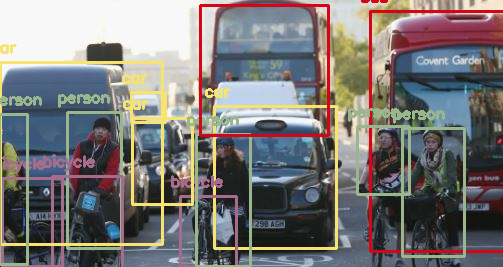

In [ ]:
Width = image.shape[1]
Height = image.shape[0]
scale = 0.00392
# read class names from text file
classes = None
with open('/datalab/coco.names', 'r') as f:
  classes = [line.strip() for line in f.readlines()]
# generate different colors for different classes 
COLORS = np.random.uniform(0, 255, size=(len(classes), 3))
# read pre-trained model and config file
net = cv2.dnn.readNet("/datalab/yolov3.cfg", "/datalab/yolov3.weights")
# create input blob 
blob = cv2.dnn.blobFromImage(image, scale, (416,416), (0,0,0), True, 
crop=False)
# set input blob for the network
net.setInput(blob)
# function to get the output layer names 
# in the architecture
def get_output_layers(net):
  layer_names = net.getLayerNames()
  output_layers = [layer_names[i - 1] for i in
net.getUnconnectedOutLayers()]
  return output_layers
# function to draw bounding box on the detected object with class name
def draw_bounding_box(img, class_id, confidence, x, y, x_plus_w, y_plus_h):
  label = str(classes[class_id])
  color = COLORS[class_id]
  cv2.rectangle(img, (x,y), (x_plus_w,y_plus_h), color, 2)
  cv2.putText(img, label, (x-10,y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 
2)
# run inference through the network
# and gather predictions from output layers
outs = net.forward(get_output_layers(net))
# initialization
class_ids = []
confidences = []
boxes = []
conf_threshold = 0.5
nms_threshold = 0.4
# for each detetion from each output layer 
# get the confidence, class id, bounding box params
# and ignore weak detections (confidence < 0.5)
for out in outs:
  for detection in out:
    scores = detection[5:]
    class_id = np.argmax(scores)
    confidence = scores[class_id]
    if confidence > 0.5:
      center_x = int(detection[0] * Width)
      center_y = int(detection[1] * Height)
      w = int(detection[2] * Width)
      h = int(detection[3] * Height)
      x = center_x - w / 2
      y = center_y - h / 2
      class_ids.append(class_id)
      confidences.append(float(confidence))
      boxes.append([x, y, w, h])
# apply non-max suppression
indices = cv2.dnn.NMSBoxes(boxes, confidences, conf_threshold, nms_threshold)
# go through the detections remaining
# after nms and draw bounding box
for i in indices:
  # i = i[0]
  box = boxes[i]
  x = box[0]
  y = box[1]
  w = box[2]
  h = box[3]
  draw_bounding_box(image, class_ids[i], confidences[i], round(x), round(y), 
round(x+w), round(y+h))
# display output image 
cv2_imshow(image)
# wait until any key is pressed
cv2.waitKey()
# release resources
cv2.destroyAllWindows()